# I would like to give a little information about animes in this project.That is why I research the anime file.I hope you will enjoy with my research and even find your favorite one.

# First I setted up Spark and imported required libraries.

In [1]:
import findspark
findspark.init()

In [2]:
import seaborn as t 
import pyspark
import pyspark.sql.functions as sq
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, split, explode, desc
from pyspark.sql.types import StringType, LongType, DoubleType

In [3]:
t.set()

In [4]:
sr = pyspark.SparkContext(appName='anime.csv')
spark = SparkSession(sr)

# Then I uploaded the anime.cvs file.

In [5]:
anime = spark.read.csv('./anime.csv', header=True, inferSchema=True)

In [6]:
type(anime)

pyspark.sql.dataframe.DataFrame

# You can see below  first 10 animes on the list.

In [7]:
anime.limit(10).toPandas()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [8]:
anime.printSchema()

root
 |-- anime_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- type: string (nullable = true)
 |-- episodes: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- members: integer (nullable = true)



# There are the animes with best ratings.

In [38]:
rating = anime.select('name', 'rating')
rating = (rating.groupBy('name', 'rating').agg(sq.count('*').alias('rating')).sort('rating',ascending=False))
rating.limit(10).toPandas()

,name,rating,rating
0,Taka no Tsume 8: Yoshida-kun no X-Files,10,1
1,Ginga Eiyuu Densetsu,9,1
2,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9,1
3,Yakusoku: Africa Mizu to Midori,9,1
4,Clannad: After Story,9,1
5,Shenmi Shijie Lixian Ji,9,1
6,Gintama°,9,1
7,Gintama&#039;,9,1
8,Okaachan Gomen ne,9,1
9,Gintama,9,1


# There are you can find a table with only name, genre and ratings. It is visually clearer and simplifies the list.

In [21]:
anime.select('name', "genre", 'rating').limit(1000).toPandas()

,name,genre,rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9
3,Steins;Gate,"Sci-Fi, Thriller",9
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9
...,...,...,...
995,GetBackers,"Action, Comedy, Drama, Mystery, Shounen, Super...",7
996,K,"Action, Super Power, Supernatural",7
997,Katekyo Hitman Reborn! Special,"Comedy, Shounen",7
998,Kekkaishi,"Adventure, Comedy, Fantasy, Shounen",7


# In this part, I am going to use math functions,so I change data types of rating and episodes to long(int).Then display the max of rating and episods.

In [11]:
anime= anime.withColumn("rating" , anime.rating.cast(LongType()))
anime=anime.withColumn("episodes", anime.episodes.cast(LongType()))

In [12]:
anime.groupBy().max("rating").limit(2).toPandas()

,max(rating)
0,10


In [13]:
anime.groupBy().max("episodes").limit(2).toPandas()

,max(episodes)
0,1818


# There is the realetion between episodes and ratings.As you can see, episodes have an effect on the rating.Animes with less episods are more popular. 

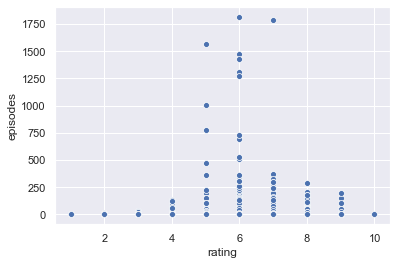

In [14]:
rating =anime.select("rating").toPandas()
rating['episodes'] =anime.select("episodes").toPandas()
t.scatterplot(x="rating", y="episodes",data=rating);

# Here you can learn the most popular genre of the animes.And of course they're comedy and school.Because the most of the anime whatchers are hight school students.

In [15]:
most_popular_genre = anime.select('genre')
most_popular_genre = most_popular_genre.withColumn("most_popular_genre", split(most_popular_genre[0], " "))
most_popular_genre = most_popular_genre.withColumn("exploded_words", explode(most_popular_genre[1]))
most_popular_genre = most_popular_genre.withColumn("exploded_words", sq.lower(most_popular_genre[2]))
most_popular_genre = most_popular_genre.filter(sq.length(most_popular_genre['exploded_words'])>0)

most_popular_genre.limit(5).toPandas()

,genre,most_popular_genre,exploded_words
0,"Drama, Romance, School, Supernatural","[Drama,, Romance,, School,, Supernatural]","drama,"
1,"Drama, Romance, School, Supernatural","[Drama,, Romance,, School,, Supernatural]","romance,"
2,"Drama, Romance, School, Supernatural","[Drama,, Romance,, School,, Supernatural]","school,"
3,"Drama, Romance, School, Supernatural","[Drama,, Romance,, School,, Supernatural]",supernatural
4,"Action, Adventure, Drama, Fantasy, Magic, Mili...","[Action,, Adventure,, Drama,, Fantasy,, Magic,...","action,"


In [16]:
most_used_word = most_popular_genre.select('exploded_words')
most_used_word = (most_used_word
         .groupBy('exploded_words')
          .agg(sq.count("*").alias("word_count"))
          .sort('word_count', ascending=False))
most_used_word.limit(20).toPandas()

,exploded_words,word_count
0,"comedy,",4042
1,"action,",2792
2,"adventure,",2254
3,"fantasy,",1902
4,"drama,",1861
5,of,1220
6,slice,1220
7,"romance,",1129
8,life,1108
9,"sci-fi,",1051


In [ ]:
sr.stop()

# Thank you for your attention. And I request you do not judge me strong. I tried to do my best).